#  Project: Predicting Job Change for Data Scientists
This notebook aims to develop a machine learning model to predict whether a data scientist is likely to look for a job change. The project includes data exploration, preprocessing, modeling, and evaluation, following best practices

Steps:

1.Exploratory Data Analysis (EDA)

2.Data Preprocessing

3.Feature Engineering

4.Model Selection and Training

5.Evaluation and Comparison

6.Insights and Conclusionsusions.

# Employee Retention Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

#  Loading the dataset

In [3]:
df=pd.read_csv('aug_train.csv')

#  Exploratory Data Analysis (EDA)

This section visualizes and summarizes the dataset to understand its characteristics and relationships with the target variable.

#  Data Preprocessing & EDA

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
df.shape

(19158, 14)

In [9]:
# Checking for null values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
# Mode-based imputation for columns with low missing values
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])
# 'Unknown' category for moderate missing values
df['gender'] = df['gender'].fillna('Unknown')
df['major_discipline'] = df['major_discipline'].fillna('Unknown')
# Will do 'Unknown' even for high missing values
df['company_size'] = df['company_size'].fillna('Unknown')
df['company_type'] = df['company_type'].fillna('Unknown')

In [12]:
# Checking for null values
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [13]:
# First let's see the unique values ​​in the Experience column.
print(df['experience'].unique())
# Now let's handle the string values
def clean_experience(value):
    if pd.isna(value):  # Missing values ke liye
        return 0
    elif value == '<1':
        return 0
    elif value == '>20':
        return 21
    else:
        return float(value)

# Apply the function
df['experience'] = df['experience'].apply(clean_experience)
# Verify the changes
print(df['experience'].unique())


['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20']
[21. 15.  5.  0. 11. 13.  7. 17.  2. 16.  1.  4. 10. 14. 18. 19. 12.  3.
  6.  9.  8. 20.]


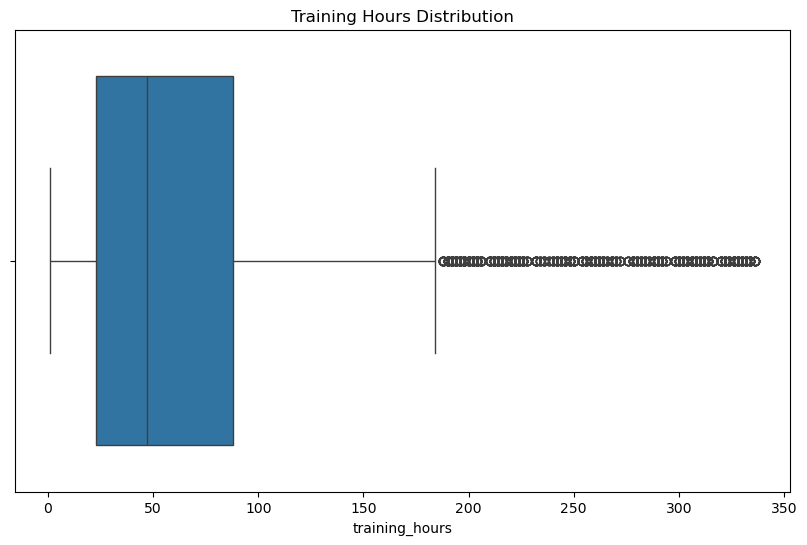

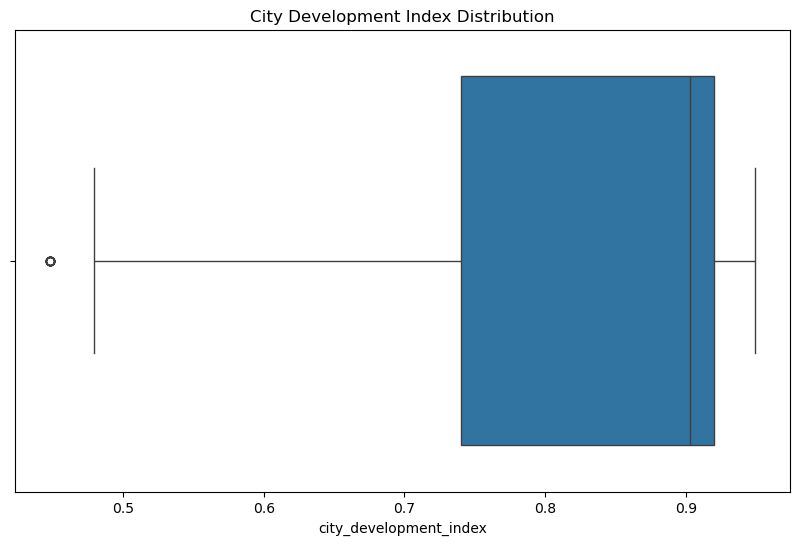

In [14]:
# Check for outliers in Training Hours
plt.figure(figsize=(10,6))
sns.boxplot(x='training_hours', data=df)
plt.title('Training Hours Distribution')
plt.show()
# Outliers of City Development Index
plt.figure(figsize=(10,6))
sns.boxplot(x='city_development_index', data=df)
plt.title('City Development Index Distribution')
plt.show()

In [15]:
# Check unique values ​​of each categorical column
for col in ['gender', 'relevent_experience', 'enrolled_university', 
            'education_level', 'major_discipline', 'company_size', 
            'company_type', 'last_new_job']:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

from sklearn.preprocessing import LabelEncoder


categorical_cols = ['gender', 'relevent_experience', 'enrolled_university',
                   'education_level', 'major_discipline', 'company_size',
                   'company_type', 'last_new_job']

label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le 


Unique values in gender:
gender
Male       13221
Unknown     4508
Female      1238
Other        191
Name: count, dtype: int64

Unique values in relevent_experience:
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Unique values in enrolled_university:
enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Unique values in education_level:
education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

Unique values in major_discipline:
major_discipline
STEM               14492
Unknown             2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

Unique values in company_size:
company_size
Unknown      5938
50-99        3083
100-500      2571
10000+   

In [16]:
# Check the relationship between education level and major discipline
pd.crosstab(df['education_level'], df['major_discipline'])
# Relationship between experience and last_new_job
pd.crosstab(df['experience'], df['last_new_job'])

last_new_job,0,1,2,3,4,5
experience,,,,,,
0.0,272,44,8,8,21,169
1.0,345,0,0,0,0,204
2.0,630,162,0,0,0,335
3.0,719,190,73,0,35,337
4.0,789,219,59,67,0,269
5.0,770,198,73,64,71,254
6.0,644,199,67,64,77,165
7.0,494,193,61,68,81,131
8.0,394,145,57,45,77,84


In [17]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

Number of duplicate records: 0


In [18]:
# Basic statistics of numerical columns
print(df.describe())

# Value counts of categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True))

        enrollee_id  city_development_index        gender  \
count  19158.000000            19158.000000  19158.000000   
mean   16875.358179                0.828848      1.415962   
std     9616.292592                0.123362      0.918061   
min        1.000000                0.448000      0.000000   
25%     8554.250000                0.740000      1.000000   
50%    16982.500000                0.903000      1.000000   
75%    25169.750000                0.920000      1.000000   
max    33380.000000                0.949000      3.000000   

       relevent_experience  enrolled_university  education_level  \
count         19158.000000         19158.000000     19158.000000   
mean              0.280092             1.545255         0.689686   
std               0.449056             0.800123         0.995951   
min               0.000000             0.000000         0.000000   
25%               0.000000             1.000000         0.000000   
50%               0.000000             2.0

In [19]:
def clean_job_years(value):
    if pd.isna(value):
        return 0
    elif value == 'never':
        return 0
    elif value == '>4':
        return 5
    elif value == '<1':
        return 0
    else:
        return float(value)

df['last_new_job'] = df['last_new_job'].apply(clean_job_years)

In [20]:
print(df.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                float64
company_size                int32
company_type                int32
last_new_job              float64
training_hours              int64
target                    float64
dtype: object


In [21]:
# If a numerical column is in a string then convert it
# Convert experience column to numerical (if string)
df['experience'] = df['experience'].replace('>20', '21')
df['experience'] = pd.to_numeric(df['experience'])
print(df)

       enrollee_id      city  city_development_index  gender  \
0             8949  city_103                   0.920       1   
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       3   
3            33241  city_115                   0.789       3   
4              666  city_162                   0.767       1   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       3   

       relevent_experience  enrolled_university  education_level  \
0                        0                    2                0   
1                        1                    2                0   
2                        1 

# Data Exploration

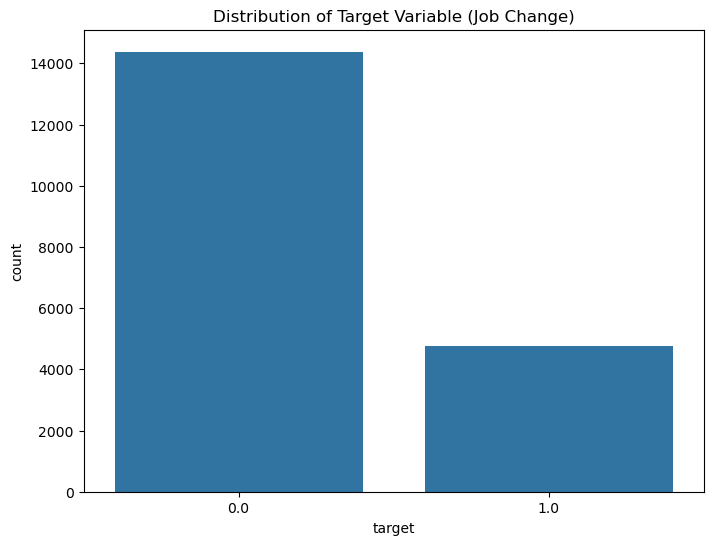

Target Distribution:
target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64
New Target Distribution after SMOTE:
target
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


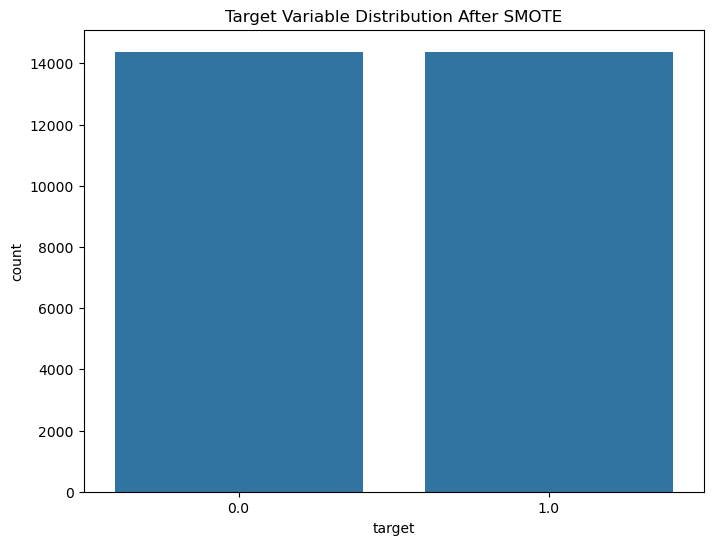

Data preprocessing complete. Ready for model training.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Target Variable Analysis
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable (Job Change)')
plt.show()

# Percentage of target variable
target_dist = df['target'].value_counts(normalize=True) * 100
print("Target Distribution:")
print(target_dist)

from imblearn.over_sampling import SMOTE


categorical_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
                    'education_level', 'major_discipline', 'company_size', 'company_type', 
                    'last_new_job']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


X = df.drop(columns=['target', 'enrollee_id'])  
y = df['target']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


new_target_dist = pd.Series(y_resampled).value_counts(normalize=True) * 100
print("New Target Distribution after SMOTE:")
print(new_target_dist)


plt.figure(figsize=(8,6))
sns.countplot(x=y_resampled)
plt.title('Target Variable Distribution After SMOTE')
plt.show()

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print("Data preprocessing complete. Ready for model training.")

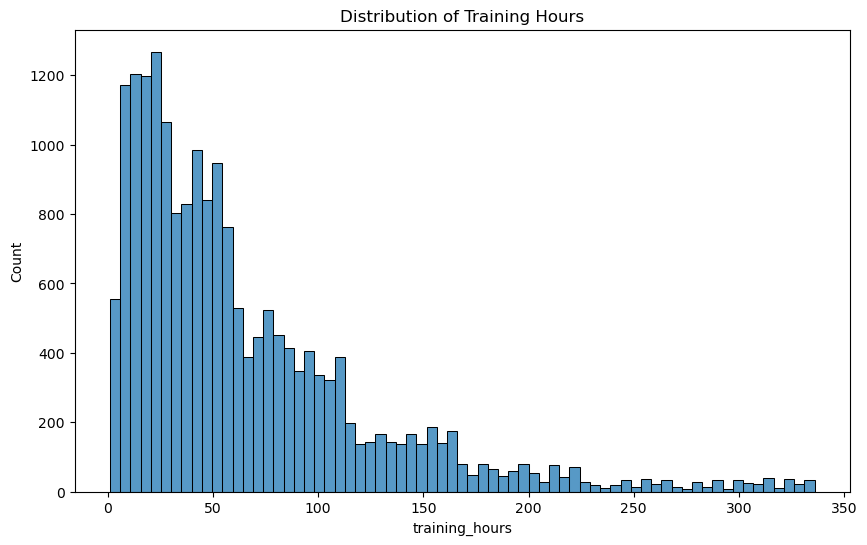

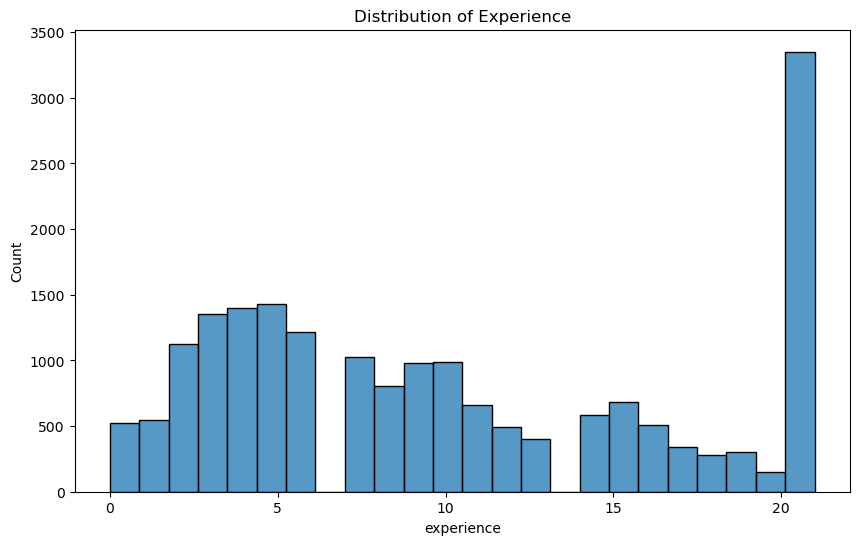

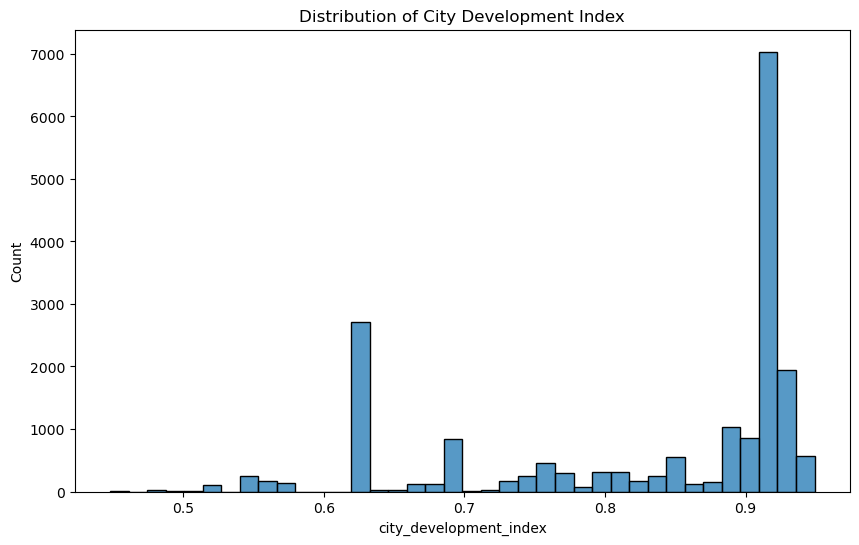

In [23]:
#Basic Statistics and Distribution Analysis:
# Analysis of Numerical Columns

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of training hours
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='training_hours')
plt.title('Distribution of Training Hours')
plt.show()

# Distribution of Experience
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='experience')
plt.title('Distribution of Experience')
plt.show()

# Distribution of City Development Index
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='city_development_index')
plt.title('Distribution of City Development Index')
plt.show()


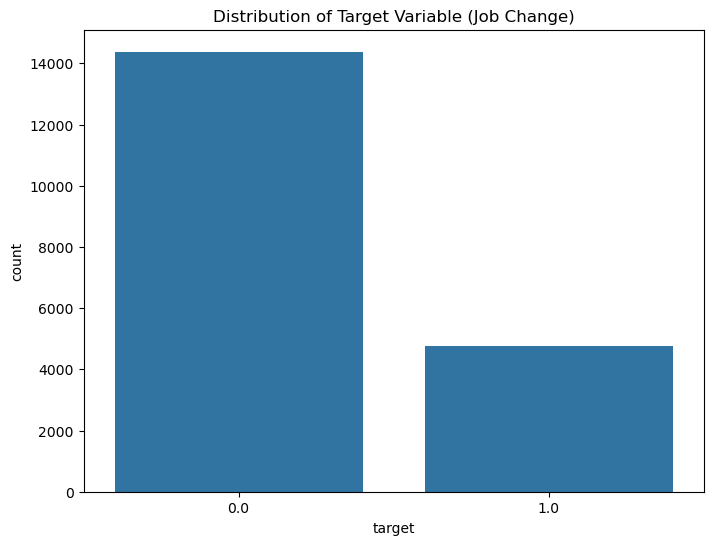

Percentage distribution of target variable:
target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64


In [24]:
#Target Variable Analysis:

# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable (Job Change)')
plt.show()

# Percentage of target variable
target_percentages = df['target'].value_counts(normalize=True) * 100
print("Percentage distribution of target variable:")
print(target_percentages)

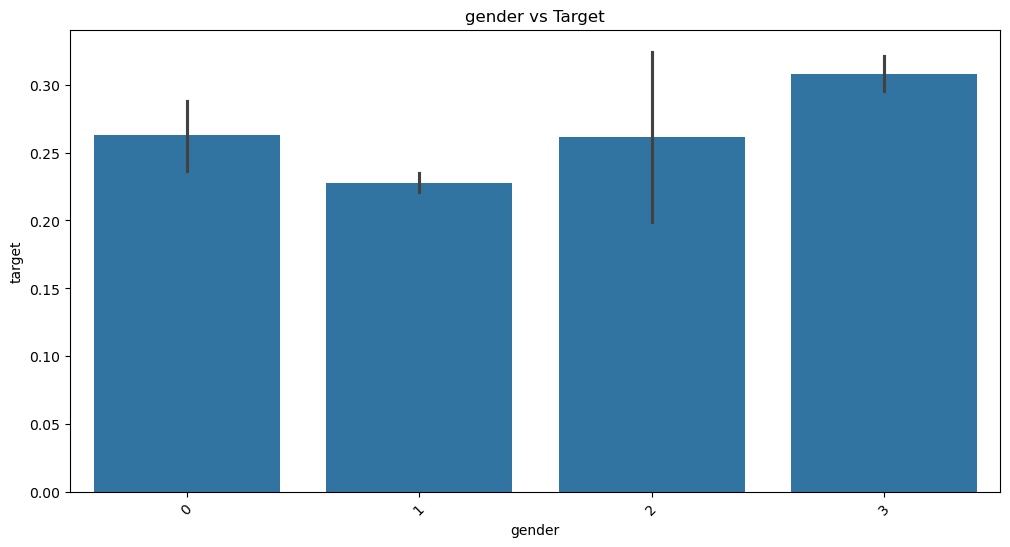

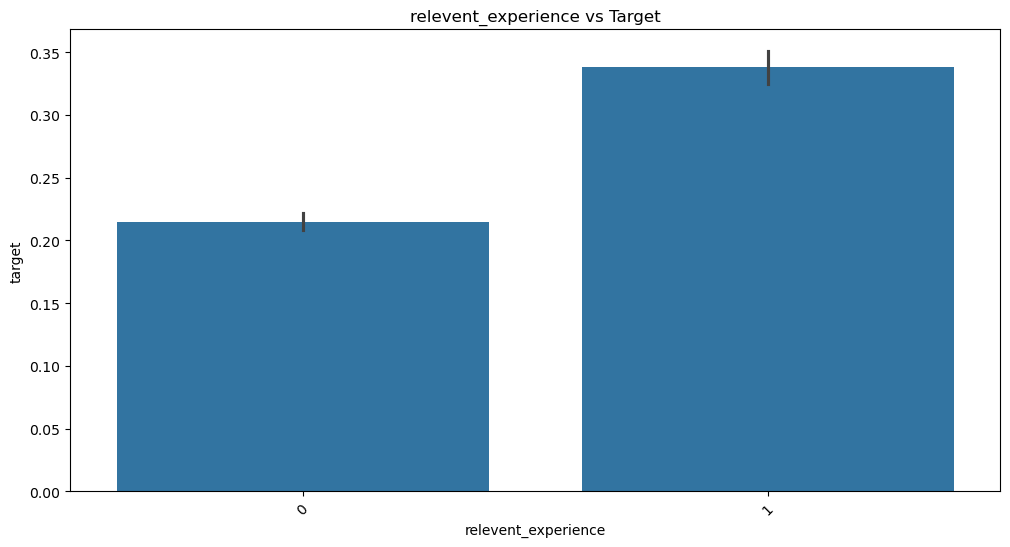

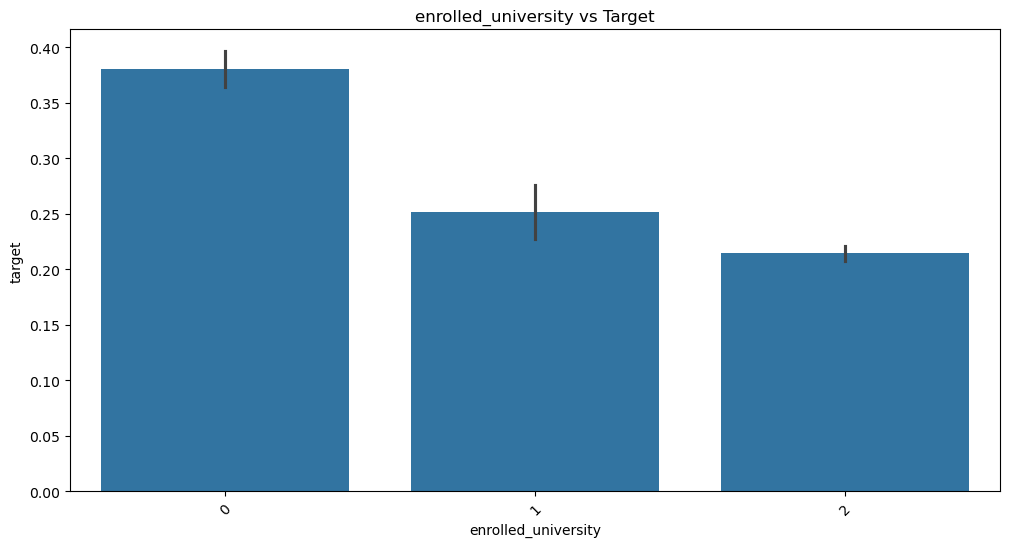

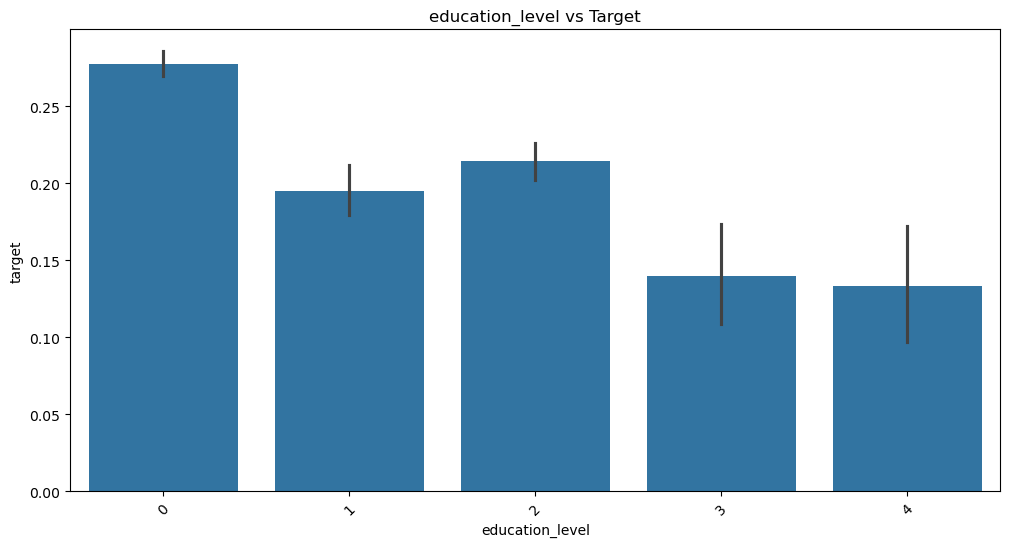

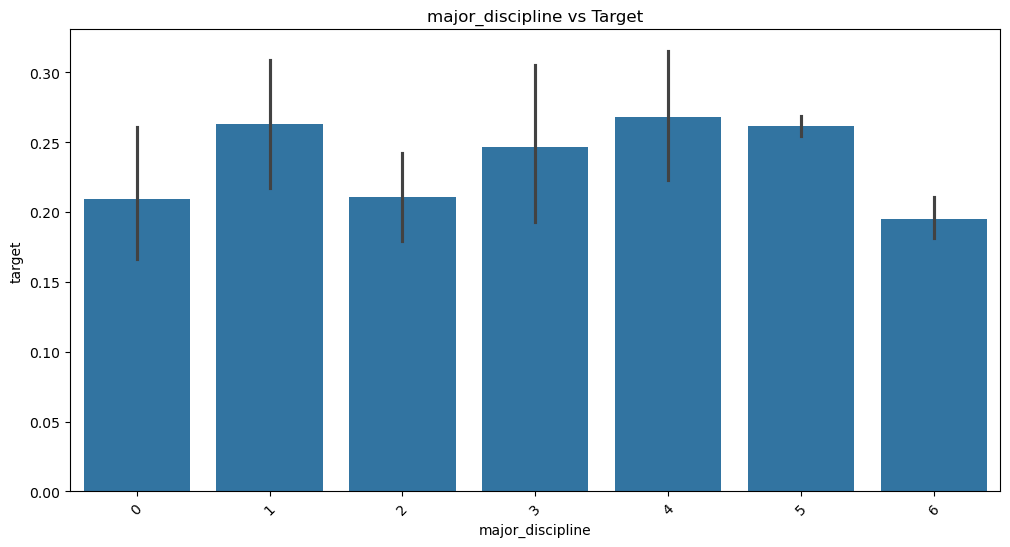

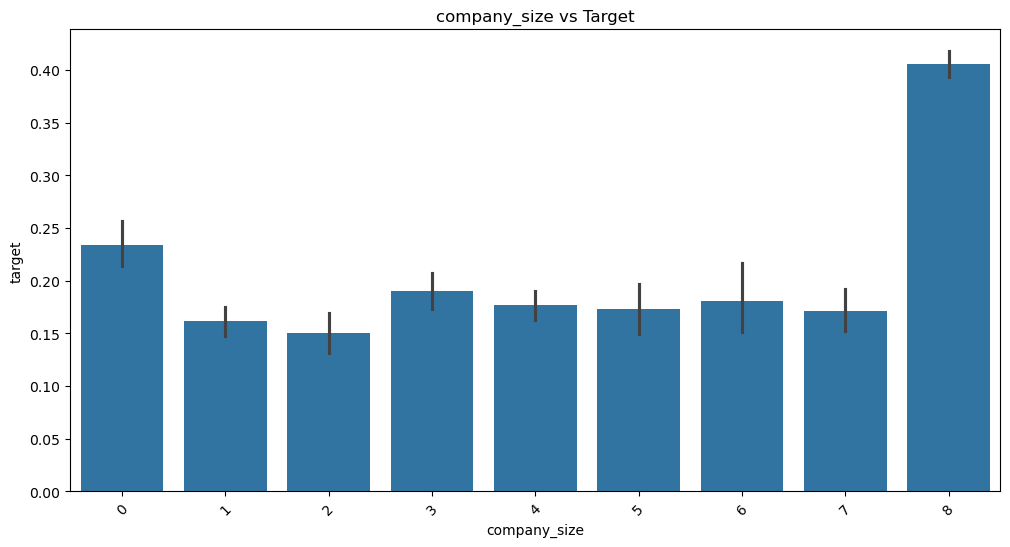

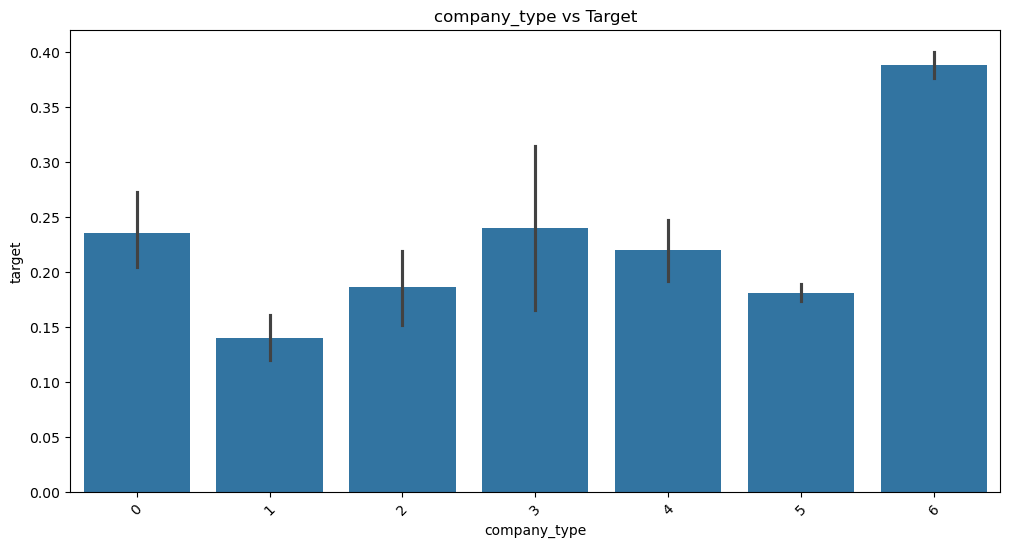

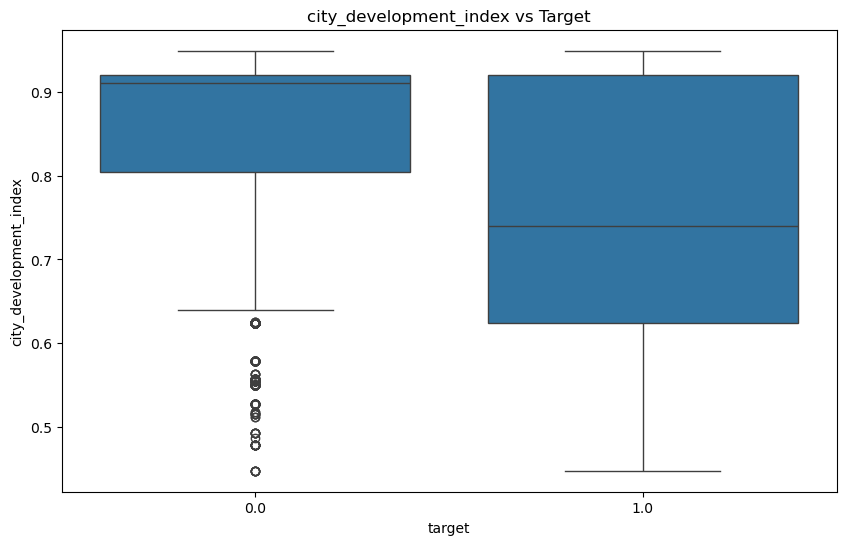

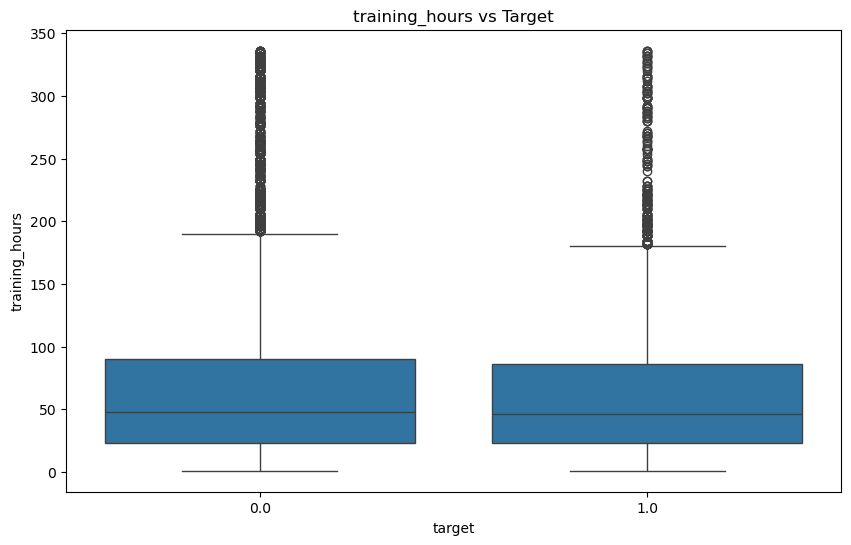

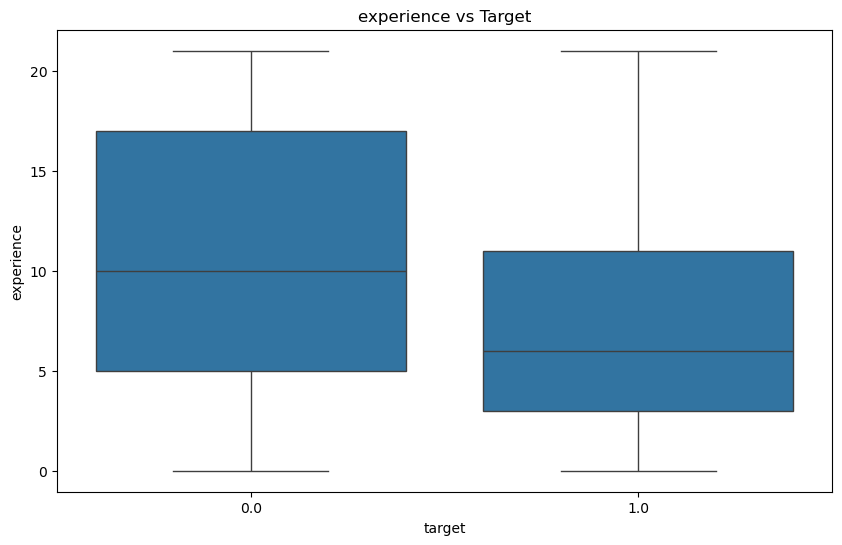

In [25]:
#Feature Relationships with Target:
# Categorical features vs Target
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                   'education_level', 'major_discipline', 'company_size', 
                   'company_type']

for col in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x=col, y='target')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Target')
    plt.show()

# Numerical features vs Target
numerical_cols = ['city_development_index', 'training_hours', 'experience']

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f'{col} vs Target')
    plt.show()

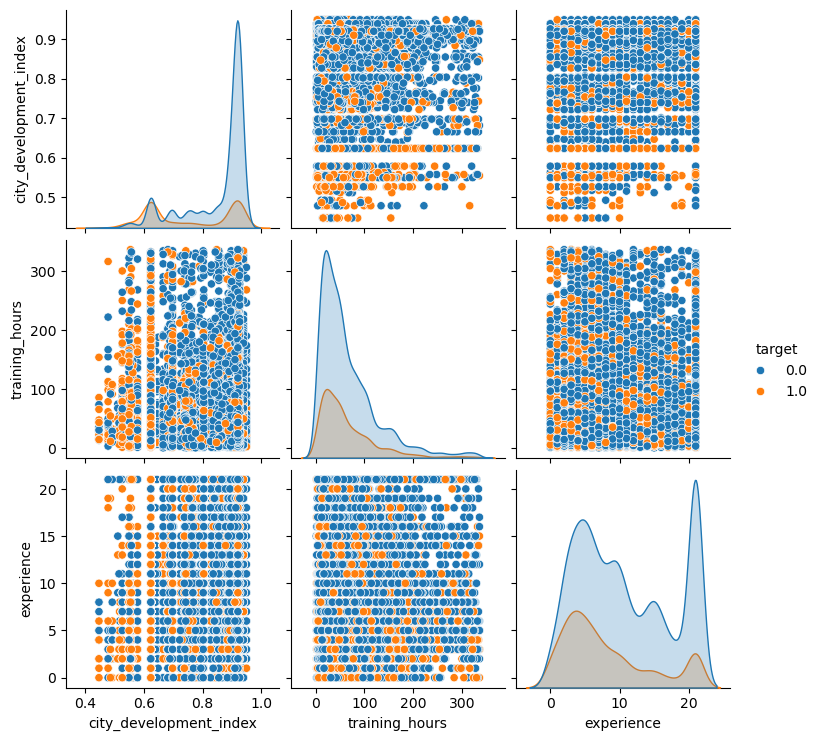

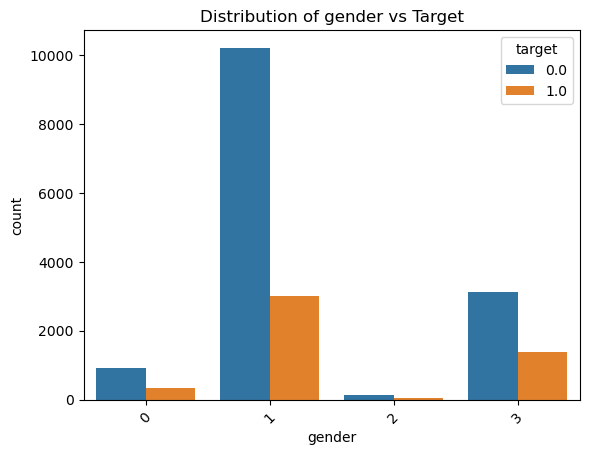

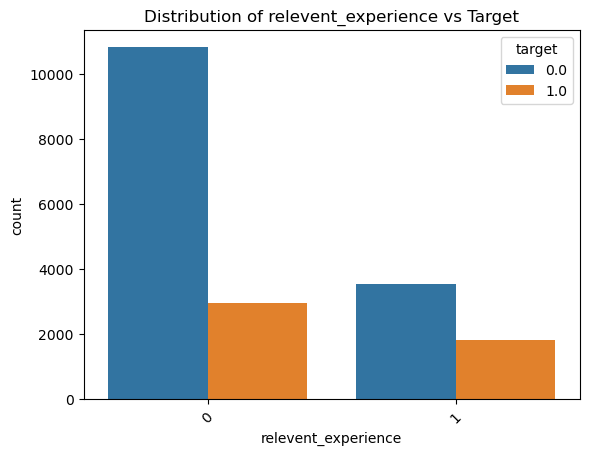

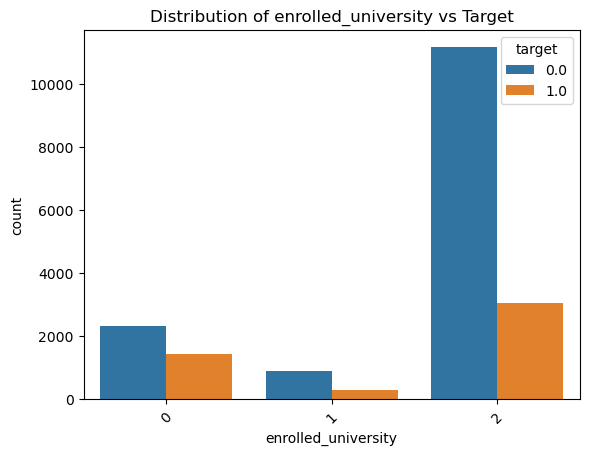

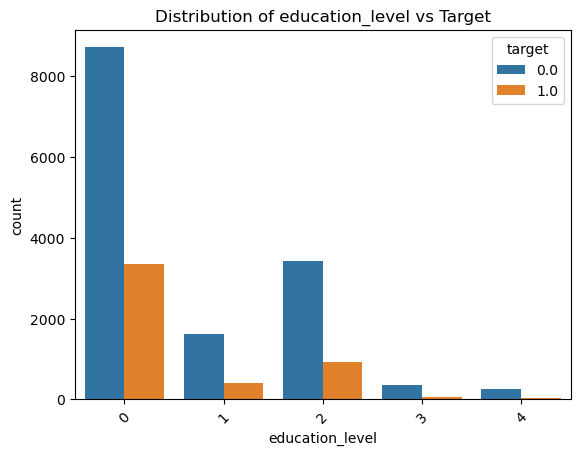

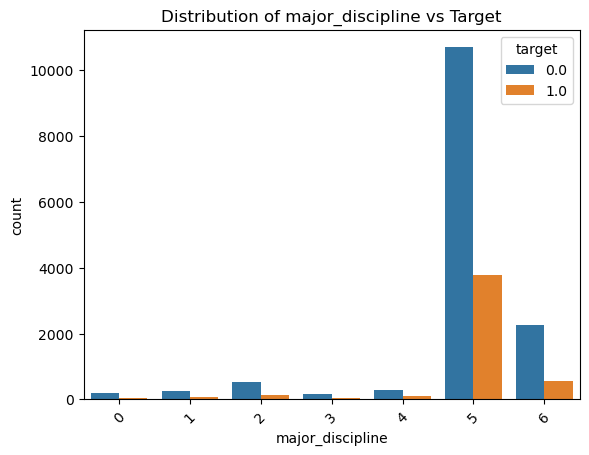

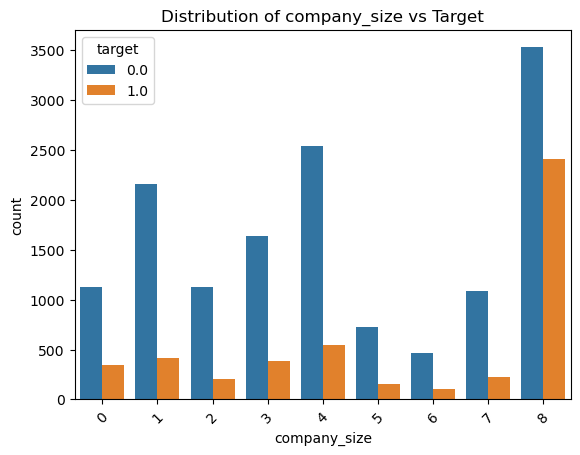

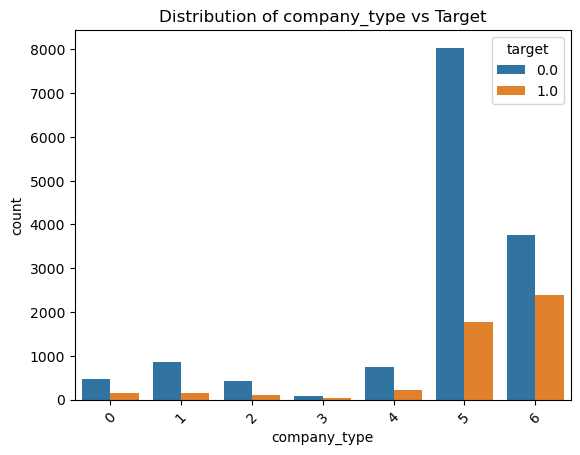

In [26]:
sns.pairplot(df[['city_development_index', 'training_hours', 'experience', 'target']], hue='target')
plt.show()

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'Distribution of {col} vs Target')
    plt.xticks(rotation=45)
    plt.show()

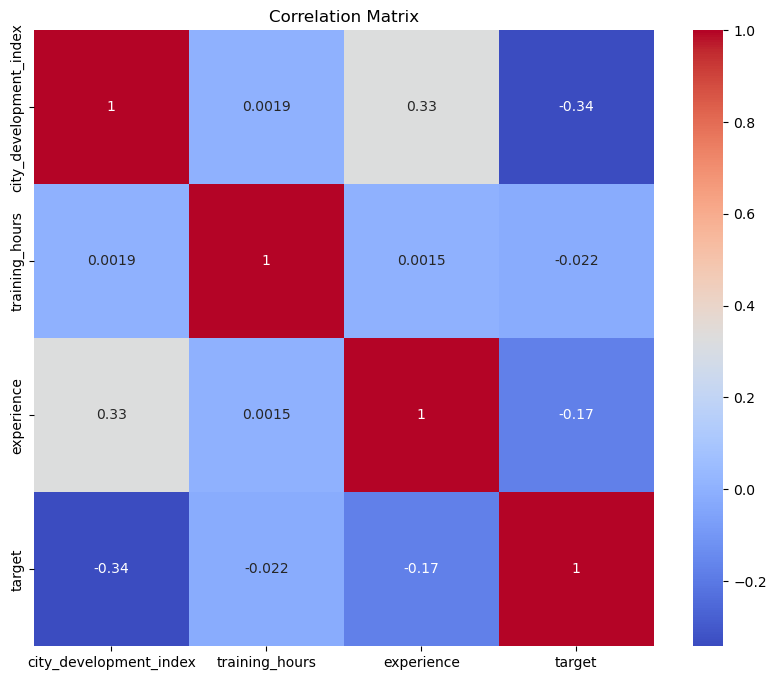

In [27]:
#Correlation Analysis:
# Correlation matrix
numerical_df = df[['city_development_index', 'training_hours', 'experience', 'target']]
correlation = numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
#Feature Importance Analysis:
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['target'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f'\n{col}:')
    print(f'Chi-square statistic: {chi2:.2f}')
    print(f'p-value: {p_value:.4f}')


gender:
Chi-square statistic: 117.38
p-value: 0.0000

relevent_experience:
Chi-square statistic: 315.34
p-value: 0.0000

enrolled_university:
Chi-square statistic: 440.46
p-value: 0.0000

education_level:
Chi-square statistic: 160.45
p-value: 0.0000

major_discipline:
Chi-square statistic: 64.22
p-value: 0.0000

company_size:
Chi-square statistic: 1161.96
p-value: 0.0000

company_type:
Chi-square statistic: 959.83
p-value: 0.0000


#  Predictive modeling - ML Algorithms

In [29]:
#  Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
#  Feature Importance Analysis
feature_importances = rf.feature_importances_
features = X.columns

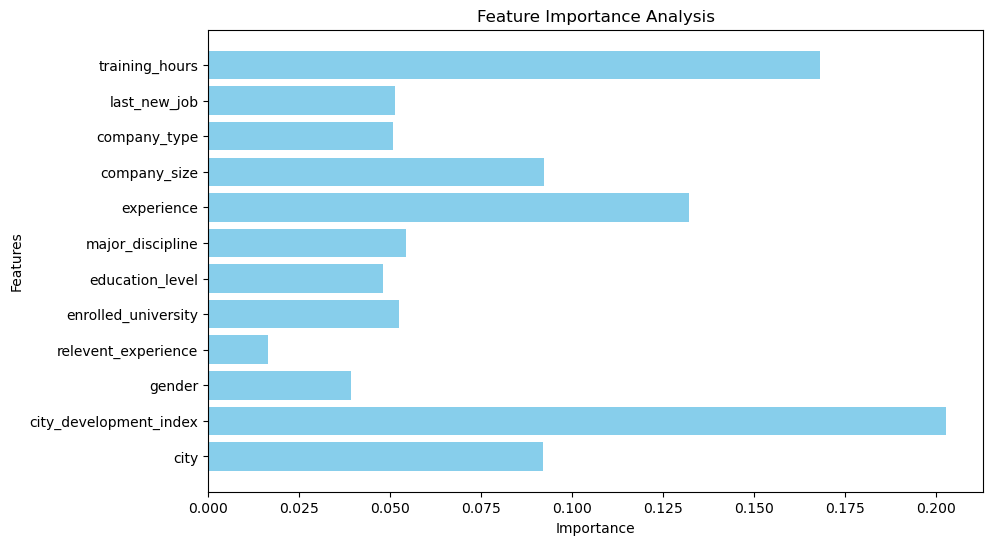

In [31]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Model saved as 'trained_model.pkl'
Model Performance Metrics:
Accuracy: 0.83
Precision: 0.83
Recall: 0.84
F1-Score: 0.83
ROC-AUC: 0.91

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      2877
         1.0       0.83      0.84      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



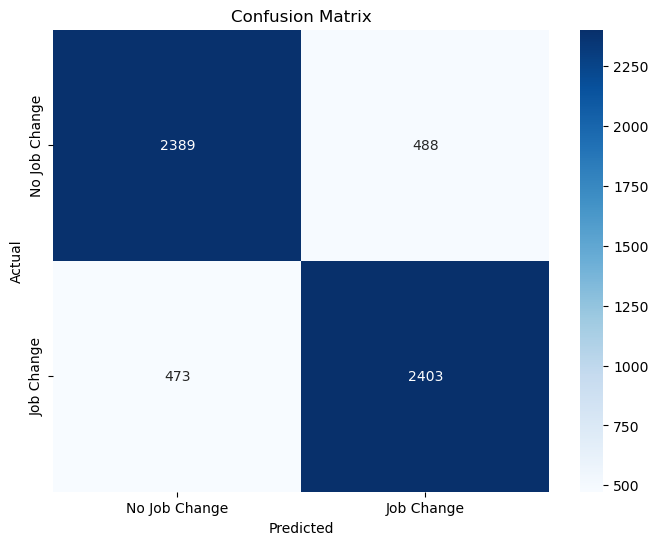

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


joblib.dump(model, 'trained_model.pkl')
print("Model saved as 'trained_model.pkl'")


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Job Change', 'Job Change'], yticklabels=['No Job Change', 'Job Change'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming `X` is the feature matrix and `y` is the target variable
# Replace this with your preprocessed data
# Example: 
# X = <your preprocessed feature data>
# y = <your target column>

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Dictionary to hold results
results = {}

# Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_logistic),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_logistic)
}

# XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_xgb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}

# LightGBM
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
results['LightGBM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lgbm),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_lgbm),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lgbm)
}

# Print results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"ROC-AUC: {metrics['ROC-AUC']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

[LightGBM] [Info] Number of positive: 3825, number of negative: 11501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 15326, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249576 -> initscore=-1.100876
[LightGBM] [Info] Start training from score -1.100876
Model: Logistic Regression
Accuracy: 0.7727035490605428
ROC-AUC: 0.7735367063492063
Confusion Matrix:
[[2693  187]
 [ 684  268]]

Model: XGBoost
Accuracy: 0.784446764091858
ROC-AUC: 0.7927393353174603
Confusion Matrix:
[[2528  352]
 [ 474  478]]

Model: LightGBM
Accuracy: 0.7925365344467641
ROC-AUC: 0.8027710302871148
Confusion Matrix:
[[2475  405]
 [ 390  562]]

